In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LinearRegression

In [2]:
# load the dataset
bigdatamart=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')

In [3]:
bigdatamart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
bigdatamart.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# Data Analysis


In [5]:
# Total data points and features

bigdatamart.shape

(8523, 12)

In [6]:
# See all columns

bigdatamart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
# Getting information about the dataset
bigdatamart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Categorical features:
Item_Identifier ,Item_Fat_Content ,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type

In [8]:
# Data for only nummerical values

bigdatamart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
# check for null values
bigdatamart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:>

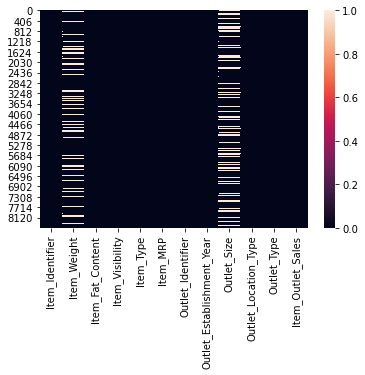

In [10]:
sns.heatmap(bigdatamart.isnull())

# Handling Missing Values by imputation
Mean (for numerical values) and Mode(for categorical values) we will be using

In [11]:
#mean value of "item_weight"
bigdatamart['Item_Weight'].mean()

12.857645184136183

In [12]:
# Filling the missing values with its mean
bigdatamart['Item_Weight'].fillna(bigdatamart['Item_Weight'].mean(),inplace=True)

In [13]:
bigdatamart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
#mode value of "Outlet_Size"
mode=bigdatamart.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))
mode

# we are creating this pivot table in comparision with outlet type which is a related feature with the feature we need to work ipon

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [15]:
missing_values=bigdatamart['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [16]:
# Locating the outlet size on the basic of outlet type and replacing only that values with the mode value.

bigdatamart.loc[missing_values,'Outlet_Size']=bigdatamart.loc[missing_values,'Outlet_Type'].apply(lambda x:mode)

In [17]:
bigdatamart.isnull().sum()

# this way we have treated the missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

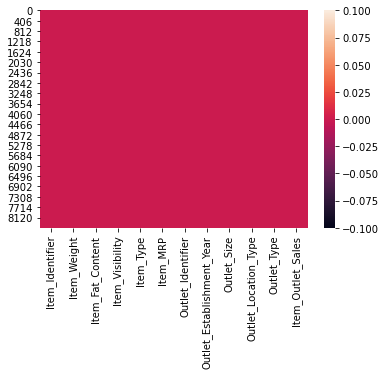

In [18]:
sns.heatmap(bigdatamart.isnull())


# Data visualization


In [19]:
# see the data distribution for numerical variables

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


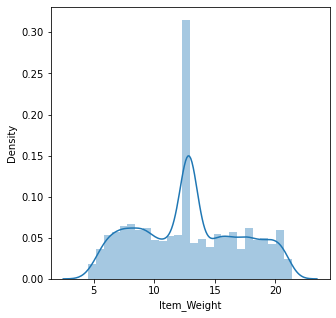

In [20]:
plt.figure(figsize=(5,5))
sns.distplot(bigdatamart['Item_Weight'])
plt.show()

# Hence its clearly visible that out mean lies somewhere around 12

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


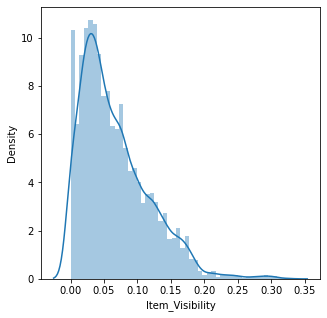

In [21]:
plt.figure(figsize=(5,5))
sns.distplot(bigdatamart['Item_Visibility'])
plt.show()

# shows skweness 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


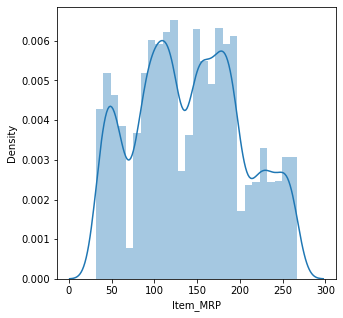

In [22]:
plt.figure(figsize=(5,5))
sns.distplot(bigdatamart['Item_MRP'])
plt.show()

# Not a normal distribution

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


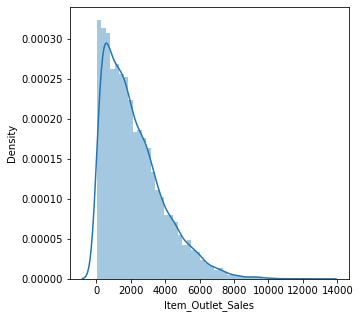

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(bigdatamart['Item_Outlet_Sales'])
plt.show()


# Shows skewness

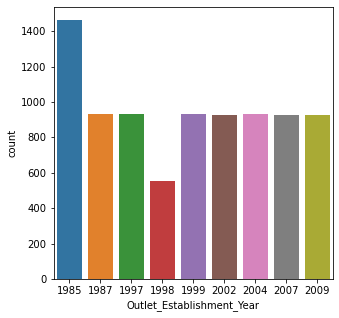

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Establishment_Year',data=bigdatamart)
plt.show()


In [25]:
# See the data distribution for Categorical variables


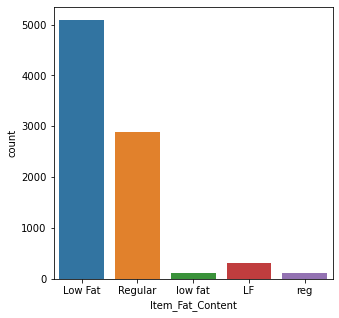

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content',data=bigdatamart)
plt.show()

# it clearly shows that the data is not clear data and we need to treat it

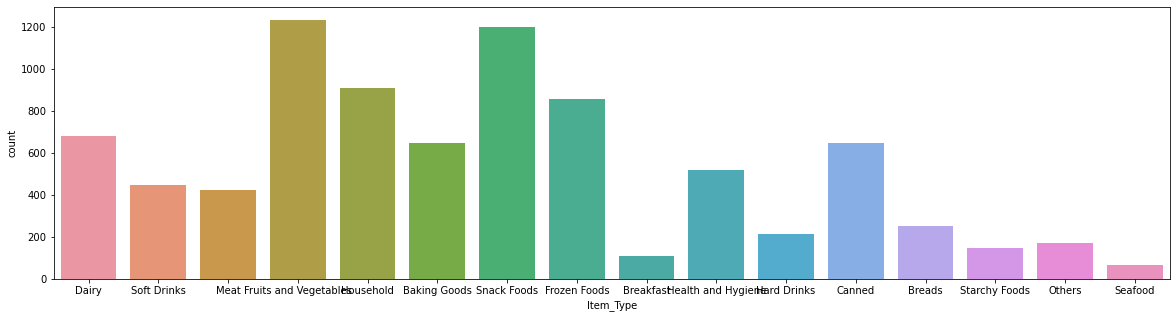

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(x='Item_Type',data=bigdatamart)
plt.show()

#Fruits and vegetables and snack food are having high values

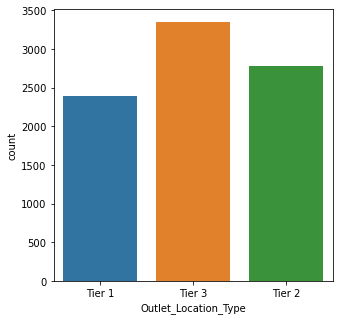

In [28]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outlet_Location_Type',data=bigdatamart)
plt.show()
 # Tier 3 is having highest value compared to tier 1 and 2

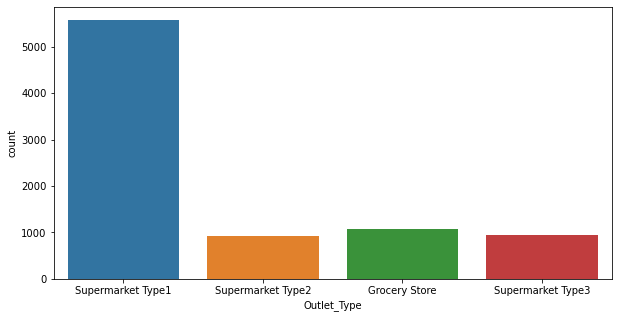

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Type',data=bigdatamart)
plt.show()

# Supermarket Type 1 is having highest count whereas other have similar type of counts

# Data Preprocessing

We need to convert all categorical variables into also 

In [30]:
bigdatamart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
bigdatamart['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
# We will working on the values of the feature as it has values with similar meaning but different name.
#We will be making it same to avoid any type of confusion

In [33]:
bigdatamart.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [34]:
# Now we can see the data is clear now with two categories only

bigdatamart['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

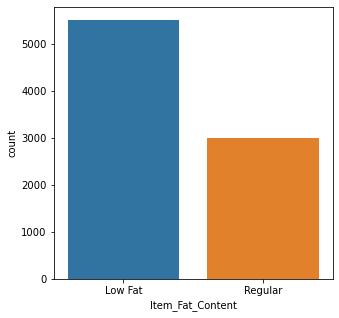

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content',data=bigdatamart)
plt.show()
 # Now the data is clean and shows only in two distribution

# label encoding
'''Transform each lable into a unique encoder such as 0,1,2...'''

In [36]:
from sklearn .preprocessing import LabelEncoder
encoder=LabelEncoder()

In [37]:
bigdatamart['Item_Identifier']=encoder.fit_transform(bigdatamart['Item_Identifier'])

In [38]:
bigdatamart['Item_Fat_Content']=encoder.fit_transform(bigdatamart['Item_Fat_Content'])

In [39]:
bigdatamart['Item_Type']=encoder.fit_transform(bigdatamart['Item_Type'])

In [40]:
bigdatamart['Outlet_Identifier']=encoder.fit_transform(bigdatamart['Outlet_Identifier'])

In [41]:
bigdatamart['Outlet_Size']=encoder.fit_transform(bigdatamart['Outlet_Identifier'])

In [42]:
bigdatamart['Outlet_Location_Type']=encoder.fit_transform(bigdatamart['Outlet_Location_Type'])

In [43]:
bigdatamart['Outlet_Type']=encoder.fit_transform(bigdatamart['Outlet_Type'])

In [44]:
bigdatamart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,9,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,3,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,9,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,1,2,1,994.7052


# Now the dataset is having absolutely numerical values and no categorical values

In [45]:
# Split the feature and target 


In [46]:
x=bigdatamart.drop(columns='Item_Outlet_Sales',axis=1)# independent variables(feature)
y=bigdatamart['Item_Outlet_Sales'] # Dependent variale(target)

In [47]:
print(x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [48]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


# Splitting data into training and testing set

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
print('X-train shape:',x_train.shape)
print('Y-train shape:',y_train.shape)
print('X-test shape:',x_test.shape)
print('Y-test shape:',y_test.shape)

X-train shape: (6818, 11)
Y-train shape: (6818,)
X-test shape: (1705, 11)
Y-test shape: (1705,)


# Training The Model

# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()

In [53]:
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [54]:
# Evaluation
# For training data


In [55]:
dtree_y_train_pred=dtree.predict(x_train)

In [56]:
# R -squared Value(lies within 0 to 1)
y_train_dtree=metrics.r2_score(y_train,dtree_y_train_pred)
print('y_train_dtree:',y_train_dtree)
# If this r2 score is close to 1 then it is said to be a good model 

# mean__sq_error
mean_sq_error_dtree_train=metrics.mean_squared_error(y_train,dtree_y_train_pred,squared= False)
print('mean_sq_error_dtree_train:',mean_sq_error_dtree_train)

y_train_dtree: 1.0
mean_sq_error_dtree_train: 0.0


In [57]:
# Evaluation
# Fot test data

In [58]:
dtree_y_test_pred=dtree.predict(x_test)

In [59]:
# R -squared Value(lies within 0 to 1)
y_test_dtree=metrics.r2_score(y_test,dtree_y_test_pred)
print('y_test_dtree:',y_test_dtree)
# If this r2 score is close to 1 then it is said to be a good model 

# mean__sq_error
mean_sq_error_dtree_test=metrics.mean_squared_error(y_train,dtree_y_train_pred,squared= False)
print('mean_sq_error_dtree_test:',mean_sq_error_dtree_test)

y_test_dtree: 0.18776577238727798
mean_sq_error_dtree_test: 0.0


# Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [61]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [62]:
# Evaluation
# training data

In [63]:

rf_y_train_pred=rf.predict(x_train)


In [64]:
# R -squared Value(lies within 0 to 1)
r2_train_rf=metrics.r2_score(y_train,rf_y_train_pred)
print('r2_train_rf:',r2_train_rf)
# If this r2 score is close to 1 then it is said to be a good model 

# mean__sq_error
mean_sq_error_rf_train=metrics.mean_squared_error(y_train,rf_y_train_pred,squared= False)
print('mean_sq_error_rf_train:',mean_sq_error_rf_train)

r2_train_rf: 0.937948205346365
mean_sq_error_rf_train: 421.78699352834775


In [65]:
# Evaluation
# testing data

In [66]:

rf_y_test_pred=rf.predict(x_test)


In [67]:
# R -squared Value(lies within 0 to 1)
r2_test_rf=metrics.r2_score(y_test,rf_y_test_pred)
print('r2_test_rf:',r2_test_rf)

# mean__sq_error
mean_sq_error_rf_test=metrics.mean_squared_error(y_test,rf_y_test_pred,squared= False)
print('mean_sq_error_rf_test:',mean_sq_error_rf_test)

r2_test_rf: 0.5486389676954506
mean_sq_error_rf_test: 1180.4173957193043


# XGBoost Regressor

In [68]:
from xgboost import XGBRegressor


In [69]:
regressor=XGBRegressor()

In [70]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
# Evaluation
# training data

In [72]:

xg_y_train_pred=regressor.predict(x_train)


In [73]:
# R -squared Value(lies within 0 to 1)
r2_train_xg=metrics.r2_score(y_train,xg_y_train_pred)
print('r2_train_xg:',r2_train_xg)
# If this r2 score is close to 1 then it is said to be a good model 

# mean__sq_error
mean_sq_error_xg_train=metrics.mean_squared_error(y_train,xg_y_train_pred,squared= False)
print('mean_sq_error_xg_train:',mean_sq_error_xg_train)

r2_train_xg: 0.8589562021934799
mean_sq_error_xg_train: 635.9061231964738


In [74]:
# Evaluation
# testing data

In [75]:
xg_y_test_pred=regressor.predict(x_test)


In [76]:
# R -squared Value(lies within 0 to 1)
r2_test_xg=metrics.r2_score(y_test,xg_y_test_pred)
print('r2_test_xg:',r2_test_xg)

# mean__sq_error
mean_sq_error_xg_test=metrics.mean_squared_error(y_test,xg_y_test_pred,squared= False)
print('mean_sq_error_xg_test:',mean_sq_error_xg_test)

r2_test_xg: 0.5304668733482136
mean_sq_error_xg_test: 1203.9451154484925


In [77]:
result=pd.DataFrame({'Models':['Decision tree','Random Forest','XGBoost Regressor'],
                    'Mean_Square_Error_traindata':[mean_sq_error_dtree_train,mean_sq_error_rf_train,mean_sq_error_xg_train],
                     'Mean_Square_Error_testdata':[mean_sq_error_dtree_test,mean_sq_error_rf_test,mean_sq_error_xg_test]})
result

,Models,Mean_Square_Error_traindata,Mean_Square_Error_testdata
0,Decision tree,0.000000,0.000000
1,Random Forest,421.786994,1180.417396
2,XGBoost Regressor,635.906123,1203.945115


In [78]:
result.sort_values(by=['Mean_Square_Error_testdata'], ascending=False)

,Models,Mean_Square_Error_traindata,Mean_Square_Error_testdata
2,XGBoost Regressor,635.906123,1203.945115
1,Random Forest,421.786994,1180.417396
0,Decision tree,0.000000,0.000000


# Hyper tuning

In [79]:
# Random forest

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [81]:
# Defining models and its parameter
model1=RandomForestRegressor()
n_estimators=[10,100,1000]
max_depth=range(1,20),
min_samples_leaf=1,
min_weight_fraction_leaf=0.0,
max_features=['auto','sqrt','log2']

# Grid search
grid=dict(n_estimators=n_estimators)

grid_search_forest=GridSearchCV(estimator=model1,param_grid=grid,n_jobs=1,cv=2,error_score=0)
grid_search_forest.fit(x_train,y_train)




GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'n_estimators': [10, 100, 1000]})

In [83]:
y_cv=grid_search_forest.predict(x_test)

In [84]:
mean_sq_error_cv=metrics.mean_squared_error(y_test,y_cv,squared= False)
print('mean_sq_error_cv:',mean_sq_error_cv)

mean_sq_error_cv: 1174.6926645363596


In [85]:
# XGBoost



In [86]:
# Defining models and its parameter
model2=XGBRegressor()
n_estimators=[10,100,1000]
max_depth=range(1,20),
min_samples_leaf=1,
min_weight_fraction_leaf=0.0,
max_features=['auto','sqrt','log2']

# Grid search
grid=dict(n_estimators=n_estimators)

grid_search_forest=GridSearchCV(estimator=model2,param_grid=grid,n_jobs=1,cv=2,error_score=0)
grid_search_forest.fit(x_train,y_train)


GridSearchCV(cv=2, error_score=0,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weigh

In [87]:
y_cv2=grid_search_forest.predict(x_test)

In [88]:
mean_sq_error_cv2=metrics.mean_squared_error(y_test,y_cv2,squared= False)
print('mean_sq_error_cv2:',mean_sq_error_cv2)

mean_sq_error_cv2: 1152.5018097759719


In [89]:
result2=pd.DataFrame({'Models':['Random Forest','XGBoost Regressor'],
                      'Mean_Square_Error_testdata':[mean_sq_error_rf_test,mean_sq_error_xg_test],
                      'Mean_Square_Error_CV':[mean_sq_error_cv,mean_sq_error_cv2]})
result2

,Models,Mean_Square_Error_testdata,Mean_Square_Error_CV
0,Random Forest,1180.417396,1174.692665
1,XGBoost Regressor,1203.945115,1152.501810


In [ ]:
# Hence less the Mean Square error better is the model. So XGBoost perform better with the model

In [91]:
import pickle

In [92]:
filename= 'Big Data Walmart'
pickle.dump(regressor, open(filename,'wb'))